In [3]:
import xml.etree.ElementTree as ET
import random
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
class Product:
    def __init__(self, name, count=None):
        self.name = name  # Имя модели
        if count is not None:
            self.count = count  # Если данные переданы явно
        else:
            # Генерация данных с использованием нормального распределения
            min_rand = random.randint(250, 500)  # Минимальное значение среднего
            delt_rand = 100  # Стандартное отклонение
            self.count = np.random.normal(min_rand, delt_rand, 12)
            self.count = np.round(self.count, 0)  # Округляем до целых чисел
    
    def to_dict(self):
        return {self.name: self.count.tolist()}  # Преобразуем numpy array в список
    
    def sum(self):
        return sum(self.count)
    
    def avg(self):
        return round(sum(self.count) / len(self.count), 0)
    
    def msd(self):
        avg = self.avg()
        upper_value = sum([(v - avg) ** 2 for v in self.count])
        msd_square = upper_value / (len(self.count) - 1)
        return round(msd_square ** 0.5, 0)

In [5]:
def parse_xml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    shop = root.find('shop')
    offers = shop.find('offers').findall('offer')

    models = []
    for offer in offers:
        model_name = offer.find('name').text
        print(model_name)
        models.append(Product(name=model_name))

    return models

xml_file = 'couches.xml'
models = parse_xml(xml_file)
models

Кресло Pero с подлокотниками FIRST
Диван Brioche FIRST 2-х местный с широкими подлокотниками
Диван Brioche Premier угловой пр/лев с широкими подлокотниками


In [6]:
def list_to_df(models):
    result = {}
    for m in models:
        result[m.name] = m.count
    df = pd.DataFrame(result).T
    return df

sales_df = list_to_df(models)
sales_df

,0,1,2,3,4,5,6,7,8,9,10,11
Кресло Pero с подлокотниками FIRST,324.0,474.0,406.0,547.0,498.0,311.0,440.0,480.0,291.0,497.0,455.0,394.0
Диван Brioche FIRST 2-х местный с широкими подлокотниками,491.0,242.0,339.0,261.0,272.0,372.0,433.0,165.0,386.0,318.0,560.0,420.0
Диван Brioche Premier угловой пр/лев с широкими подлокотниками,467.0,175.0,403.0,595.0,438.0,642.0,379.0,524.0,271.0,439.0,376.0,490.0


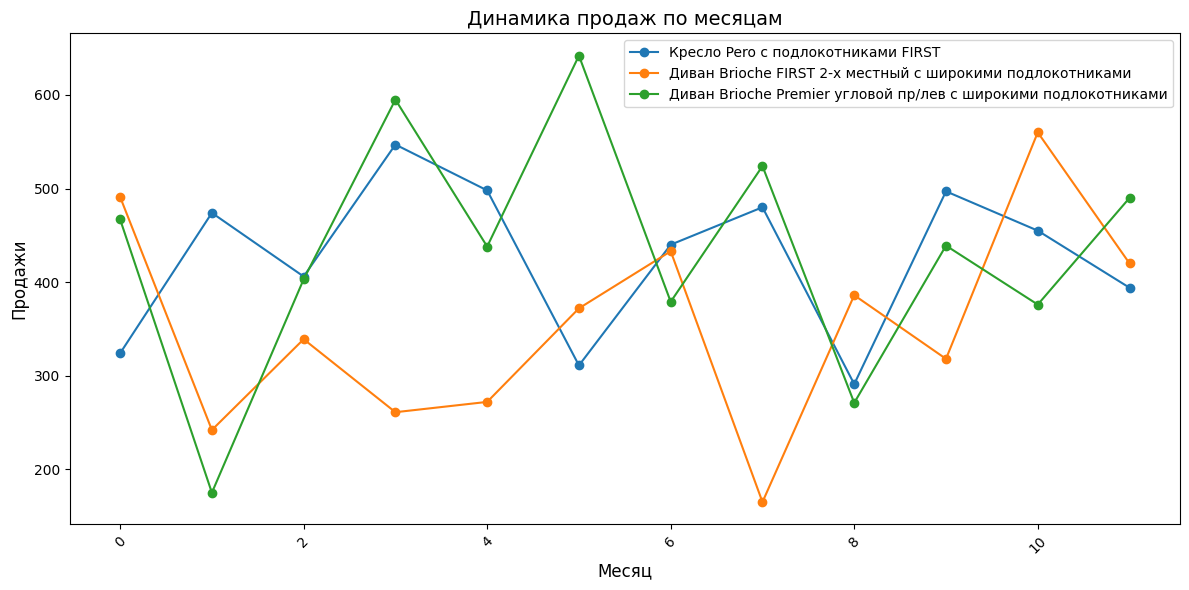

In [7]:
def visualize_sales(df):
    plt.figure(figsize=(12, 6))
    for model in sales_df.index:
        plt.plot(sales_df.columns, sales_df.loc[model], marker='o', label=model)
    plt.title("Динамика продаж по месяцам", fontsize=14)
    plt.xlabel("Месяц", fontsize=12)
    plt.ylabel("Продажи", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

visualize_sales(sales_df)

In [ ]:
p0 = [model.avg() for model in models] # средние значения
[f'{p.name}: {p_avg}' for p_avg, p in zip(p0, models)]

['Кресло Pero с подлокотниками FIRST: 426.0',
 'Диван Brioche FIRST 2-х местный с широкими подлокотниками: 355.0',
 'Диван Brioche Premier угловой пр/лев с широкими подлокотниками: 433.0']

In [ ]:
# средневадратичное отклонение
msd_products = [model.msd() for model in models]
[f'{model.name}: {msd_value}' for msd_value, model in zip(msd_products, models)]

['Кресло Pero с подлокотниками FIRST: 82.0',
 'Диван Brioche FIRST 2-х местный с широкими подлокотниками: 112.0',
 'Диван Brioche Premier угловой пр/лев с широкими подлокотниками: 129.0']

In [10]:
predict_values = np.round(p0 + np.random.normal(0, msd_products, len(msd_products)), 1)
predict_values

array([642.6, 122.8, 218.5])

In [11]:
for product, predict_value in zip(models, predict_values):
    product.count = np.append(product.count, predict_value)

models

In [12]:
sales_df = list_to_df(models)
sales_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
Кресло Pero с подлокотниками FIRST,324.0,474.0,406.0,547.0,498.0,311.0,440.0,480.0,291.0,497.0,455.0,394.0,642.6
Диван Brioche FIRST 2-х местный с широкими подлокотниками,491.0,242.0,339.0,261.0,272.0,372.0,433.0,165.0,386.0,318.0,560.0,420.0,122.8
Диван Brioche Premier угловой пр/лев с широкими подлокотниками,467.0,175.0,403.0,595.0,438.0,642.0,379.0,524.0,271.0,439.0,376.0,490.0,218.5


In [13]:
p0_np = np.array(p0)
msd_np = np.array(msd_products)
condition_one = sales_df.T - p0_np < (2 * msd_np)
condition_one.all()

Кресло Pero с подлокотниками FIRST                                False
Диван Brioche FIRST 2-х местный с широкими подлокотниками          True
Диван Brioche Premier угловой пр/лев с широкими подлокотниками     True
dtype: bool

In [14]:
condition_two = p0_np > (2 * msd_np)
condition_two

array([ True,  True,  True])

In [15]:
condition_three = sales_df > 0
condition_three

,0,1,2,3,4,5,6,7,8,9,10,11,12
Кресло Pero с подлокотниками FIRST,True,True,True,True,True,True,True,True,True,True,True,True,True
Диван Brioche FIRST 2-х местный с широкими подлокотниками,True,True,True,True,True,True,True,True,True,True,True,True,True
Диван Brioche Premier угловой пр/лев с широкими подлокотниками,True,True,True,True,True,True,True,True,True,True,True,True,True


In [16]:
def get_color_by_condition(c1, c2, c3):
    if c1 and c2 and c3:
        return "Зеленый"
    elif (not c1 and c2 and c3) or (c1 and not c2 and c3):
        return "Желтый"
    elif not c1 and not c2 and c3:
        return "Оранжевый"
    else:
        return "Красный"

table_header = ["Товар", "Уровень достоверности", "Условие 1", "Условие 2", "Условие 3"]

table_data = []

condition_one_result = condition_one.all()
condition_two_result = condition_two
condition_three_result = condition_three.all()

for i in range(len(models)):
    table_data.append({
        "Товар": models[i].name,
        "Уровень достоверности": get_color_by_condition(condition_one_result[i], condition_two_result[i], condition_three_result[i]),
        "Условие 1": condition_one_result[i],
        "Условие 2": condition_two_result[i],
        "Условие 3": condition_three_result[i]
    })

table = pd.DataFrame(table_data, columns=table_header)

def color_rows_by_reliability(val):
    if val == "Зеленый":
        return 'background-color: green'
    elif val == "Желтый":
        return 'background-color: yellow'
    elif val == "Оранжевый":
        return 'background-color: orange'
    elif val == "Красный":
        return 'background-color: red'
    else:
        return ''

table_style = table["Уровень достоверности"].to_frame().applymap(lambda x: color_rows_by_reliability(x))
styled_table = table.style.apply(lambda x: table_style, axis=None)
styled_table

,Товар,Уровень достоверности,Условие 1,Условие 2,Условие 3
0,Кресло Pero с подлокотниками FIRST,Желтый,False,True,True
1,Диван Brioche FIRST 2-х местный с широкими подлокотниками,Зеленый,True,True,True
2,Диван Brioche Premier угловой пр/лев с широкими подлокотниками,Зеленый,True,True,True
